# 构建不同国家在不同sports的奖牌向量值

## 加载数据

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
%cd dataset
!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/dataset
classified_country_medal_stats_after1950.csv	    olympic_medals_with_noc.csv
classified_country_medal_stats_after1984.csv	    olympic_score_model.pkl
classified_country_medal_stats_after1984_useCV.csv  potential_stars.csv
classified_country_medal_stats.csv		    potential_stars_filtered.csv
classified_country_medal_stats_cv.csv		    residual_plot.png
country.csv					    robust_scaler.pkl
country_medal_probability.csv			    scatter_matrix.png
country_medal_stats.csv				    score_validation.png
country_olympic_potential.csv			    sport_discipline.json
data_dictionary.csv				    sport_events.json
final_medal_table.csv				    summerOly_athletes.csv
medal_distribution.png				    summerOly_hosts.csv
merged_country_data.csv				    summerOly_medal_counts.csv
noc_codes.json					    summerOly_programs.csv
olympic_medals_2000-2020.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [8]:
athletes = pd.read_csv('summerOly_athletes.csv')
hosts = pd.read_csv('summerOly_hosts.csv')
medal_counts = pd.read_csv('summerOly_medal_counts.csv')
programs = pd.read_csv('summerOly_programs.csv',encoding='latin-1')
countrys = pd.read_csv('country.csv')

In [4]:
athletes.info()
athletes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    252565 non-null  object
 1   Sex     252565 non-null  object
 2   Team    252565 non-null  object
 3   NOC     252565 non-null  object
 4   Year    252565 non-null  int64 
 5   City    252565 non-null  object
 6   Sport   252565 non-null  object
 7   Event   252565 non-null  object
 8   Medal   252565 non-null  object
dtypes: int64(1), object(8)
memory usage: 17.3+ MB


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [10]:
df = athletes[['NOC','Sport']]
sport_list = df['Sport'].unique().tolist()  # 提取唯一值并转为列表

# 输出结果（示例）
print(f"共有 {len(sport_list)} 种不同的体育项目：")
print(sport_list)

# 可选：保存为 JSON 文件
import json
with open('sports_list.json', 'w') as f:
    json.dump(sport_list, f)

共有 76 种不同的体育项目：
['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics', 'Swimming', 'Badminton', 'Sailing', 'Gymnastics', 'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling', 'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery', 'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball', 'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo', 'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet', 'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota', 'Alpinism', 'Aeronautics', 'Cycling Road', 'Artistic Gymnastics', 'Karate', 'Baseball/Softball', 'Trampoline Gymnastics', 'Marathon Swimming', 'Canoe Slalom', 'Surfing', 'Canoe Sprint', 'Cycling BMX Racing', 'Equestrian', 'Artistic Swimming', 'Cycling Track', 'Skateboarding', 'Cycling Mountain Bike', '3x3 Bas

In [13]:
# 按国家和运动统计唯一运动员数量
df=athletes[['NOC','Sport','Name']]
athlete_count = (
    df.groupby(['NOC', 'Sport'])
    ['Name'].nunique()  # 统计唯一运动员数量
    .unstack(fill_value=0)  # 转换为宽格式
)

# 确保包含所有76个运动项目
all_sports = df['Sport'].unique()
athlete_count = athlete_count.reindex(columns=all_sports, fill_value=0)

# 重置索引并重命名列
athlete_count.reset_index(inplace=True)
athlete_count.columns.name = None  # 移除列名标签

# 保存结果
athlete_count.to_csv("country_sport_vectors.csv", index=False)

print("生成结果预览：")
print(athlete_count.head())

生成结果预览：
   NOC  Basketball  Judo  Football  Tug-Of-War  Athletics  Swimming  \
0  AFG           0     4        10           0         16         1   
1  AHO           0     3        11           0         11         5   
2  AIN           0     0         0           0          0         4   
3  ALB           0     3         0           0         10         9   
4  ALG           0    36        32           0         98        19   

   Badminton  Sailing  Gymnastics  ...  Cycling Mountain Bike  3x3 Basketball  \
0          0        0           0  ...                      0               0   
1          0        5           0  ...                      0               0   
2          0        0           0  ...                      0               0   
3          0        0           0  ...                      0               0   
4          3        5           4  ...                      0               0   

   Cycling BMX Freestyle  Sport Climbing  Marathon Swimming, Swimming  \
0    

In [16]:
# 步骤1: 过滤获奖记录（排除'No medal'）
df_medals = df[df['Medal'] != 'No medal'].copy()

# 步骤2: 按国家和运动项目统计唯一获奖运动员人数
medal_athletes = (
    df_medals.groupby(['NOC', 'Sport'])
    ['Name'].nunique()  # 统计唯一运动员数量
    .unstack(fill_value=0)  # 转换为宽表格，缺失值填0
)

# 步骤3: 确保所有76个体育项目都存在（补全缺失列）
all_sports = df['Sport'].unique()  # 确保使用原始数据中的所有运动项目
medal_athletes = medal_athletes.reindex(columns=all_sports, fill_value=0)

# 步骤4: 重置索引并处理国家代码
medal_athletes.reset_index(inplace=True)
medal_athletes.columns.name = None  # 移除列名标签

# 步骤5: 保存结果
medal_athletes.to_csv("country_sport_medal_vectors.csv", index=False)

# 验证输出
print(f"维度验证: {medal_athletes.shape[1]-1}个运动项目（+1列NOC）")
print(medal_athletes.head())

维度验证: 76个运动项目（+1列NOC）
   NOC  Basketball  Judo  Football  Tug-Of-War  Athletics  Swimming  \
0  AFG           0     0         0           0          0         0   
1  AHO           0     0         0           0          0         0   
2  AIN           0     0         0           0          0         0   
3  ALB           0     0         0           0          0         0   
4  ALG           0     2         0           0          8         0   

   Badminton  Sailing  Gymnastics  ...  Cycling Mountain Bike  3x3 Basketball  \
0          0        0           0  ...                      0               0   
1          0        1           0  ...                      0               0   
2          0        0           0  ...                      0               0   
3          0        0           0  ...                      0               0   
4          0        0           0  ...                      0               0   

   Cycling BMX Freestyle  Sport Climbing  Marathon Swimming, Swi

## 得到每个国家国奖最多的项目

In [17]:
# 读取获奖向量数据（假设列名为NOC和76个运动项目）
medal_vectors = pd.read_csv("country_sport_medal_vectors.csv")

# 设置NOC为索引
country_matrix = medal_vectors.set_index('NOC')

# 定义处理函数（处理并列最大值）
def get_top_sports(row):
    max_val = row.max()
    if max_val == 0:
        return None  # 无获奖项目的国家返回空值
    return row[row == max_val].index.tolist()

# 应用处理函数
result = country_matrix.apply(get_top_sports, axis=1).reset_index(name='Top Sports')

# 展开列表为多行（处理多个并列项目）
exploded_result = result.explode('Top Sports').dropna()

# 保存两种格式结果
result.to_csv("country_top_sports.csv", index=False)       # 原始列表格式
exploded_result.to_csv("country_top_sports_expanded.csv", index=False)  # 展开格式

print("结果已保存为 country_top_sports.csv 和 country_top_sports_expanded.csv")

结果已保存为 country_top_sports.csv 和 country_top_sports_expanded.csv


## 对国家参与项目情况做聚类分析

### 参加情况

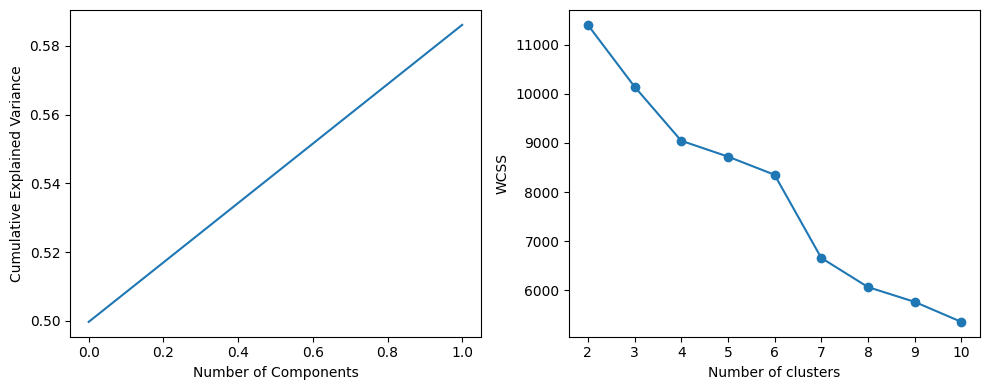

轮廓系数：0.72（取值范围[-1,1]，值越大越好）


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33719 (\N{CJK UNIFIED IDEOGRAPH-83B7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22870 (\N{CJK UNIFIED IDEOGRAPH-5956}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas

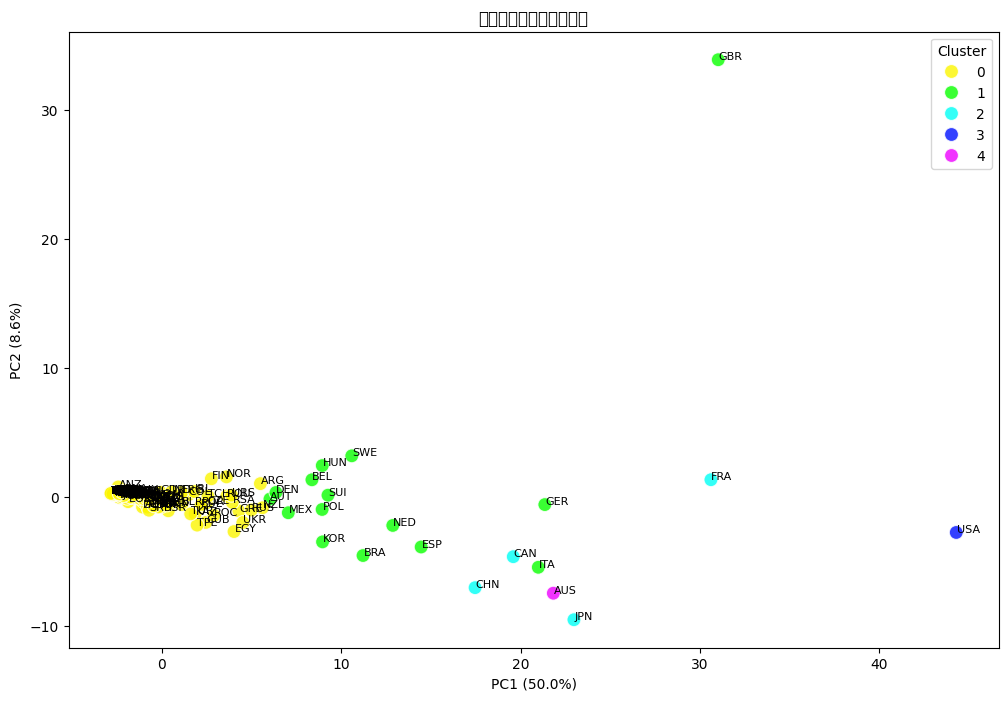


各聚类主要特征运动：

Cluster 0:
  Athletics: 60.6
  Swimming: 20.2
  Football: 17.0
  Boxing: 16.5
  Wrestling: 14.7

Cluster 1:
  Athletics: 466.1
  Rowing: 217.9
  Swimming: 211.9
  Football: 155.6
  Cycling: 155.5

Cluster 2:
  Athletics: 652.5
  Swimming: 342.8
  Rowing: 282.2
  Fencing: 204.8
  Football: 183.8

Cluster 3:
  Athletics: 2048.0
  Swimming: 765.0
  Rowing: 710.0
  Wrestling: 339.0
  Gymnastics: 314.0

Cluster 4:
  Athletics: 590.0
  Swimming: 446.0
  Rowing: 393.0
  Hockey: 284.0
  Cycling: 212.0

聚类结果已保存至 country_clusters.csv


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 读取获奖向量数据
df = pd.read_csv("country_sport_vectors.csv")

# ====== 数据预处理 ======
# 分离国家代码和特征矩阵
countries = df['NOC']
X = df.drop('NOC', axis=1)

# 标准化数据（重要！消除量纲影响）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ====== 降维可视化 ======
# 使用PCA进行2D可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制方差解释率
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# ====== 确定最佳聚类数 ======
# 肘部法则（测试k=2到10）
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()

# ====== 聚类实施 ======
# 根据图形选择最佳k值（示例选择k=5）
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 评估聚类质量
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"轮廓系数：{silhouette_avg:.2f}（取值范围[-1,1]，值越大越好）")

# ====== 结果可视化 ======
# 创建包含聚类结果的DataFrame
result_df = pd.DataFrame({
    'NOC': countries,
    'Cluster': clusters,
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1]
})

# 绘制聚类散点图
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette=sns.color_palette("hsv", optimal_k),
    data=result_df,
    s=100,
    alpha=0.8
)

# 添加国家标签
for line in range(0, result_df.shape[0]):
    plt.text(
        result_df.PC1[line]+0.02,
        result_df.PC2[line],
        result_df.NOC[line],
        horizontalalignment='left',
        fontsize=8
    )

plt.title('国家获奖模式聚类可视化')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.show()

# ====== 聚类特征分析 ======
# 计算聚类中心（原始量纲）
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=X.columns)

# 找出每个聚类的主要特征运动
top_sports_per_cluster = []
for i in range(optimal_k):
    cluster_sports = centers_df.iloc[i].sort_values(ascending=False)[:5]
    top_sports_per_cluster.append({
        'Cluster': i,
        'Top Sports': cluster_sports.index.tolist(),
        'Average Counts': cluster_sports.values.round(1).tolist()
    })

# 打印聚类特征
print("\n各聚类主要特征运动：")
for cluster_info in top_sports_per_cluster:
    print(f"\nCluster {cluster_info['Cluster']}:")
    for sport, count in zip(cluster_info['Top Sports'], cluster_info['Average Counts']):
        print(f"  {sport}: {count}")

# ====== 保存结果 ======
result_df.to_csv("country_clusters.csv", index=False)
print("\n聚类结果已保存至 country_clusters.csv")

### 获奖情况

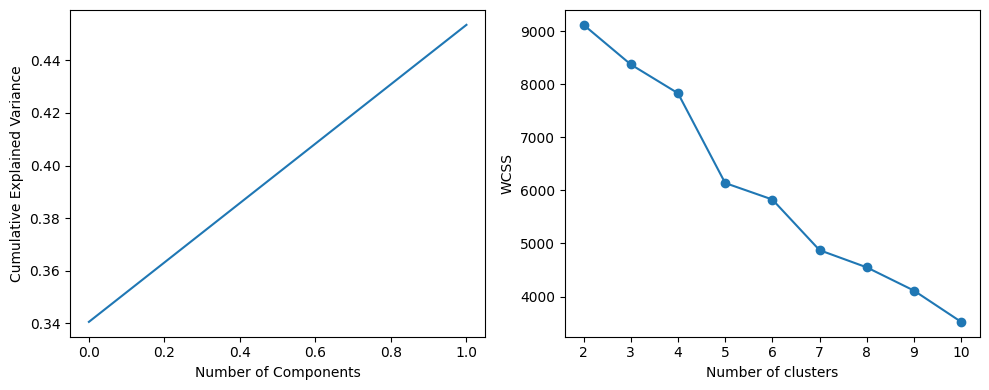

轮廓系数：0.73（取值范围[-1,1]，值越大越好）


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33719 (\N{CJK UNIFIED IDEOGRAPH-83B7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22870 (\N{CJK UNIFIED IDEOGRAPH-5956}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas

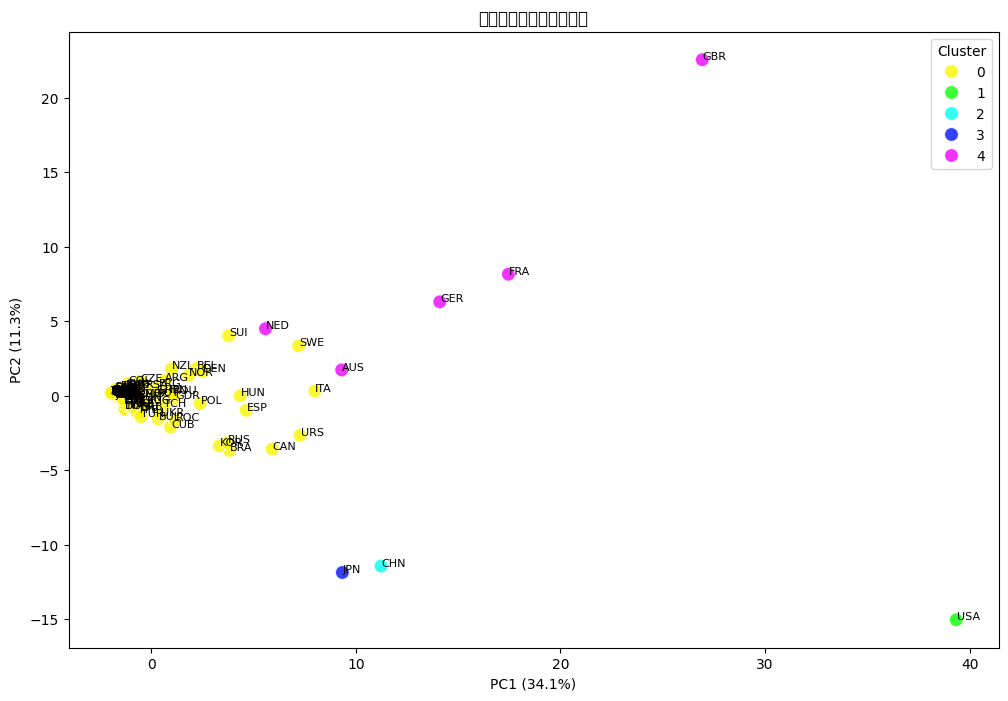


各聚类主要特征运动：

Cluster 0:
  Athletics: 11.6
  Rowing: 9.5
  Football: 8.5
  Gymnastics: 6.4
  Wrestling: 6.0

Cluster 1:
  Athletics: 757.0
  Swimming: 541.0
  Rowing: 341.0
  Basketball: 300.0
  Water Polo: 141.0

Cluster 2:
  Swimming: 68.0
  Gymnastics: 60.0
  Badminton: 60.0
  Weightlifting: 58.0
  Diving: 56.0

Cluster 3:
  Judo: 85.0
  Swimming: 84.0
  Volleyball: 84.0
  Wrestling: 69.0
  Baseball: 61.0

Cluster 4:
  Rowing: 166.0
  Hockey: 140.2
  Athletics: 126.4
  Swimming: 109.6
  Cycling: 75.6

聚类结果已保存至 country_medal_clusters.csv


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 读取获奖向量数据
df = pd.read_csv("country_sport_medal_vectors.csv")

# ====== 数据预处理 ======
# 分离国家代码和特征矩阵
countries = df['NOC']
X = df.drop('NOC', axis=1)

# 标准化数据（重要！消除量纲影响）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ====== 降维可视化 ======
# 使用PCA进行2D可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制方差解释率
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# ====== 确定最佳聚类数 ======
# 肘部法则（测试k=2到10）
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()

# ====== 聚类实施 ======
# 根据图形选择最佳k值（示例选择k=5）
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 评估聚类质量
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"轮廓系数：{silhouette_avg:.2f}（取值范围[-1,1]，值越大越好）")

# ====== 结果可视化 ======
# 创建包含聚类结果的DataFrame
result_df = pd.DataFrame({
    'NOC': countries,
    'Cluster': clusters,
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1]
})

# 绘制聚类散点图
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette=sns.color_palette("hsv", optimal_k),
    data=result_df,
    s=100,
    alpha=0.8
)

# 添加国家标签
for line in range(0, result_df.shape[0]):
    plt.text(
        result_df.PC1[line]+0.02,
        result_df.PC2[line],
        result_df.NOC[line],
        horizontalalignment='left',
        fontsize=8
    )

plt.title('国家获奖模式聚类可视化')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.show()

# ====== 聚类特征分析 ======
# 计算聚类中心（原始量纲）
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=X.columns)

# 找出每个聚类的主要特征运动
top_sports_per_cluster = []
for i in range(optimal_k):
    cluster_sports = centers_df.iloc[i].sort_values(ascending=False)[:5]
    top_sports_per_cluster.append({
        'Cluster': i,
        'Top Sports': cluster_sports.index.tolist(),
        'Average Counts': cluster_sports.values.round(1).tolist()
    })

# 打印聚类特征
print("\n各聚类主要特征运动：")
for cluster_info in top_sports_per_cluster:
    print(f"\nCluster {cluster_info['Cluster']}:")
    for sport, count in zip(cluster_info['Top Sports'], cluster_info['Average Counts']):
        print(f"  {sport}: {count}")

# ====== 保存结果 ======
result_df.to_csv("country_medal_clusters.csv", index=False)
print("\n聚类结果已保存至 country_medal_clusters.csv")